In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
import ast

In [2]:
df = pd.read_csv("evolutionary.csv")
df

,Gen Number,ID,Fitness,Weights,Diversity
0,0,20,0.100000,"[-0.4020312075611201, 0.9166337741994861, 0.57...",0.535088
1,0,18,0.098572,"[-0.16618434482262012, 0.6801886695840864, 0.8...",0.535088
2,0,6,0.093686,"[-0.16404120364130415, 0.685501526070116, 0.05...",0.535088
3,0,7,0.089068,"[0.9465410350652583, 0.03410227197040472, -0.3...",0.535088
4,0,10,0.079051,"[0.21745511819155028, 0.04119066021921847, 0.9...",0.535088
...,...,...,...,...,...
3995,199,3201,0.066132,"[0.7603318145307254, -0.3123761637020108, 0.67...",0.106246
3996,199,3198,0.060051,"[0.7603173253442463, -0.3123799399554902, 0.98...",0.106246
3997,199,3202,0.059799,"[0.9669345656372128, -0.3123763891909877, 0.59...",0.106246
3998,199,3203,0.058891,"[0.7603057312143185, -0.3123829209835156, 0.98...",0.106246


In [3]:
max_per_gen = df.groupby("Gen Number", group_keys=False).apply(
    lambda group: group[group["Fitness"] == group["Fitness"].max()],
    include_groups=False
).reset_index()

mean_per_gen = df.groupby("Gen Number", group_keys=False).apply(
    lambda group: group.assign(Fitness=group["Fitness"].mean()),
    include_groups=False
).reset_index()
mean_per_gen = mean_per_gen.iloc[::10].reset_index(drop=True)

In [4]:
mean_per_gen

,index,ID,Fitness,Weights,Diversity
0,0,20,0.053973,"[-0.4020312075611201, 0.9166337741994861, 0.57...",0.535088
1,10,11,0.053973,"[0.06300662750905683, -0.9530412839271918, 0.8...",0.535088
2,20,26,0.049802,"[-0.16325326249157318, 0.6874548356721402, -0....",0.446508
3,30,7,0.049802,"[0.9465410350652583, 0.03410227197040472, -0.3...",0.446508
4,40,50,0.061867,"[-0.16596822063574151, 0.29601660837632826, 0....",0.446272
...,...,...,...,...,...
395,3950,3120,0.162325,"[0.7602436952956435, -0.3123988687937968, 0.98...",0.170353
396,3960,3159,0.157648,"[0.7602712266552868, -0.31239179263305894, 0.9...",0.132603
397,3970,3182,0.157648,"[0.8450284382828365, -0.3123908106746309, 0.98...",0.132603
398,3980,3191,0.159848,"[0.7602675754093762, -0.3123927336517769, 0.98...",0.106246


In [5]:
def plot_graph(x_values, y_values, title):
    # Optional: set a nice style
    plt.style.use("tableau-colorblind10")  # or 'ggplot', 'bmh', 'fivethirtyeight', etc.

    # Create your figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))  # you can adjust the size

    # Plot something
    ax.plot(x_values, y_values, label='Label', color='blue', marker='o')

    # Add titles and labels
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('X Axis Label', fontsize=12)
    ax.set_ylabel('Y Axis Label', fontsize=12)

    # Grid, legend, etc.
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()
    ax.tick_params(axis='both', labelsize=10)

    # Optional: annotate points
    # ax.annotate('Note', xy=(x, y), xytext=(x+1, y+1), arrowprops=dict(arrowstyle='->'))

    # Save or show
    plt.tight_layout()
    plt.show()  # Show the plot


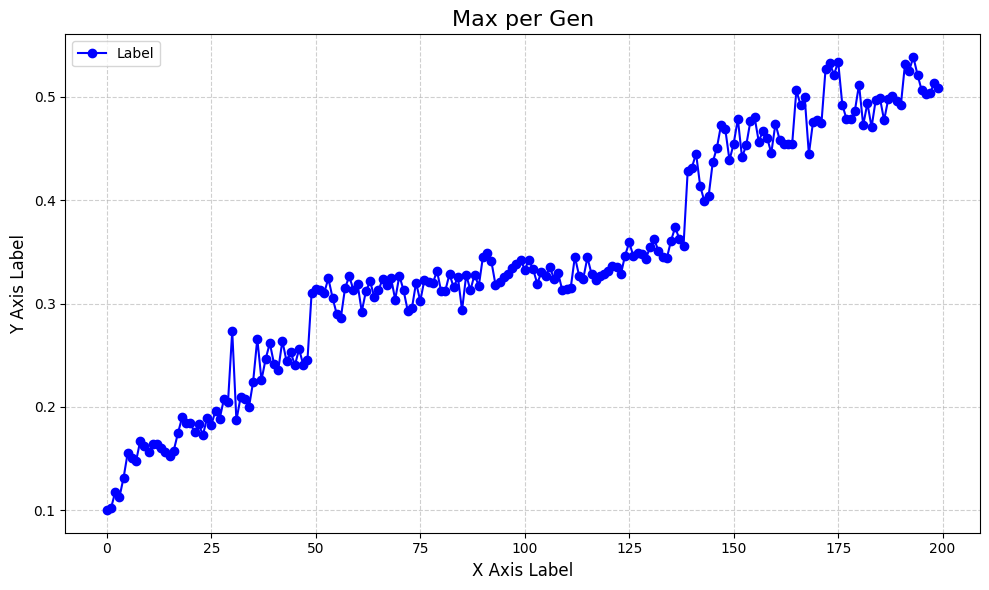

In [6]:
x_values = max_per_gen.index
y_values = max_per_gen["Fitness"]

plot_graph(x_values, y_values, "Max per Gen")

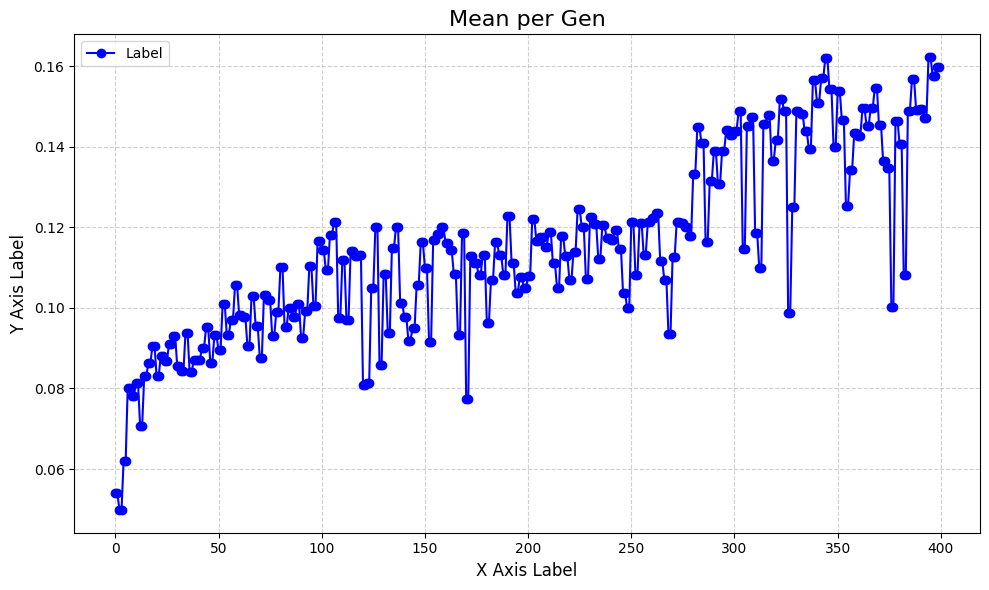

In [7]:
x_values = mean_per_gen.index
y_values = mean_per_gen["Fitness"]

plot_graph(x_values, y_values, "Mean per Gen")

0.9999931296948645
-0.9999636374805398


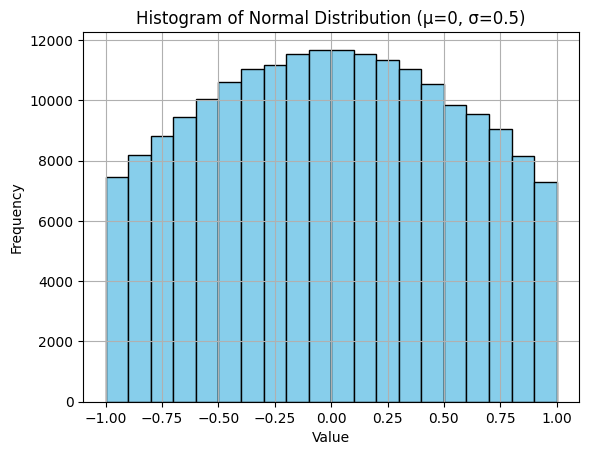

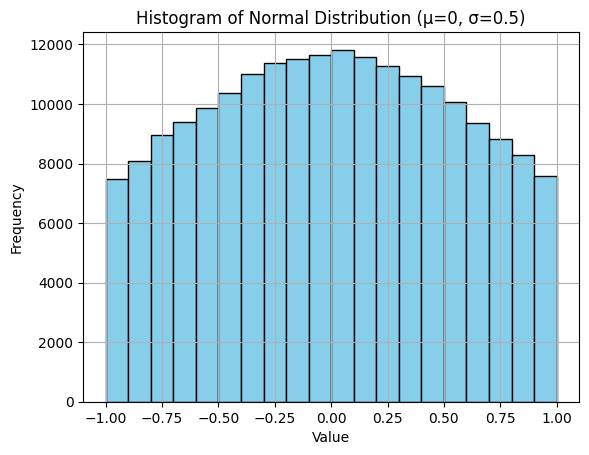

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

# Parameters
mu = 0
sigma = 1
a, b = -1, 1  # Truncate between -1 and 1

# Transform bounds to standard normal space
a_std, b_std = (a - mu) / sigma, (b - mu) / sigma

# Create truncated normal distribution
trunc_normal = truncnorm(a_std, b_std, loc=mu, scale=sigma)

# Sample
samples = trunc_normal.rvs(200000)


# Generate normally distributed data
normal_dist = []
for _ in range(200000):
    sig = 1
    a = np.random.normal(0, sig)
    while a < -1 or a > 1:
        a = np.random.normal(0, sig)
        
    normal_dist.append(a)

print(max(samples))
print(min(samples))
# Plot histogram
plt.hist(normal_dist, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Normal Distribution (μ=0, σ=0.5)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.hist(samples, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Normal Distribution (μ=0, σ=0.5)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [9]:
gene_matrix = np.array([ast.literal_eval(w) for w in df.loc[df["Gen Number"] == 0]["Weights"]])
diversity = np.mean(np.std(gene_matrix, axis=0))



def compute_shannon_entropy(population, bins=10):
    """
    Computes the average Shannon entropy across all gene positions.
    population: list of individuals, each a list of real-valued genes
    bins: number of bins to discretize real values into
    """
    population = np.array(population)
    n_genes = population.shape[1]
    entropies = []

    for gene_idx in range(n_genes):
        gene_values = population[:, gene_idx]

        # Discretize real values into bins
        hist, _ = np.histogram(gene_values, bins=bins, density=True)
        hist = hist[hist > 0]  # remove 0s to avoid log2(0)

        # Normalize to get probabilities
        p = hist / np.sum(hist)

        # Calculate entropy for this gene
        h = entropy(p, base=2)
        entropies.append(h)

    return np.mean(entropies)

compute_shannon_entropy([ast.literal_eval(w) for w in df.loc[df["Gen Number"] == 0]["Weights"]])

np.float64(2.916359007384042)

In [10]:
# for gen in range(max(df["Gen Number"]) + 1):
#     rows =  df.loc[df["Gen Number"] == gen]
#     gene_matrix = np.array([ast.literal_eval(w) for w in rows["Weights"]])
#     diversity = np.mean(np.std(gene_matrix, axis=0))
#     df.loc[df["Gen Number"] == gen, "Diversity"] = diversity

In [11]:
df

,Gen Number,ID,Fitness,Weights,Diversity
0,0,20,0.100000,"[-0.4020312075611201, 0.9166337741994861, 0.57...",0.535088
1,0,18,0.098572,"[-0.16618434482262012, 0.6801886695840864, 0.8...",0.535088
2,0,6,0.093686,"[-0.16404120364130415, 0.685501526070116, 0.05...",0.535088
3,0,7,0.089068,"[0.9465410350652583, 0.03410227197040472, -0.3...",0.535088
4,0,10,0.079051,"[0.21745511819155028, 0.04119066021921847, 0.9...",0.535088
...,...,...,...,...,...
3995,199,3201,0.066132,"[0.7603318145307254, -0.3123761637020108, 0.67...",0.106246
3996,199,3198,0.060051,"[0.7603173253442463, -0.3123799399554902, 0.98...",0.106246
3997,199,3202,0.059799,"[0.9669345656372128, -0.3123763891909877, 0.59...",0.106246
3998,199,3203,0.058891,"[0.7603057312143185, -0.3123829209835156, 0.98...",0.106246


In [12]:
diversity_per_gen = df.groupby("Gen Number")["Diversity"].mean().reset_index()

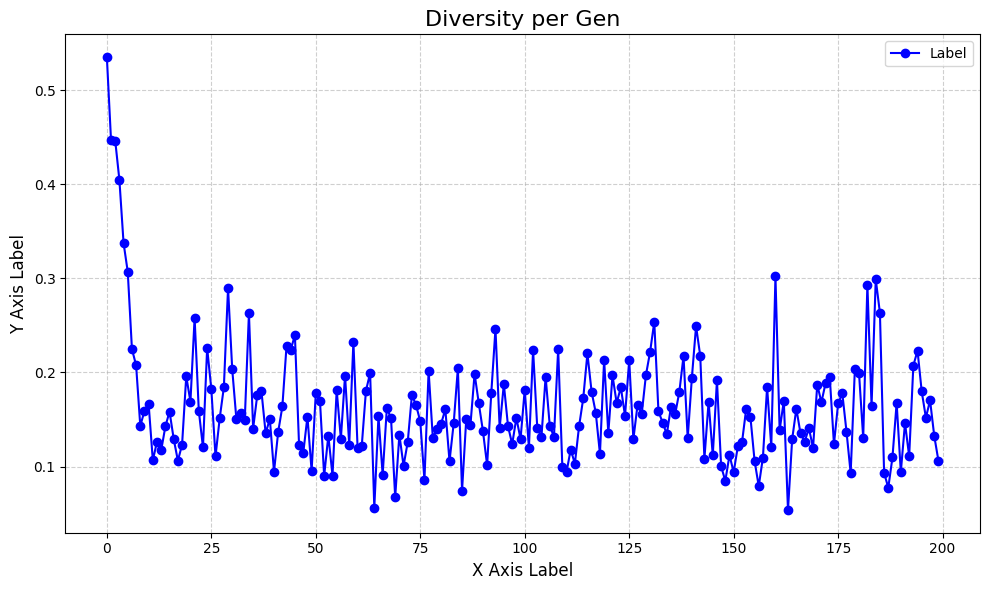

In [13]:
x_values = diversity_per_gen.index
y_values = diversity_per_gen["Diversity"]

plot_graph(x_values, y_values, "Diversity per Gen")